In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Me = 6.0E24
Ms = 1.99E30

In [3]:
G = 6.67E-11

In [4]:
X0 = 1.48E11
Y0 = 0
V0x = 0
V0y = 1.5E4

In [5]:
dt = 1000
times = np.arange(0, 31537000, dt)

mininum distance from sun: 21227961082.74317 m


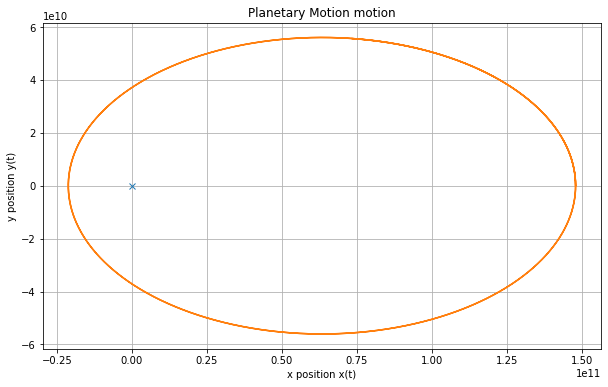

In [7]:
X = []
Y = []
Vx = []
Vy = []
r = []
cosines = []
sines = []
U = []
K = []
def calcU(r):
    return -G*Ms*Me/r
def calcK(v):
    return .5*Me*(v**2)
#leapfrog integration
for i in range(len(times)):
    if i==0:
        X.append(X0)
        Y.append(Y0)
        Vx.append(V0x)
        Vy.append(V0y)
        r.append(np.sqrt(X[i]**2 + Y[i]**2))
        U.append(calcU(r[i]))
        K.append(calcK(np.sqrt(Vx[i]**2+Vy[i]**2)))
        cosines.append(X[i]/r[i])
        sines.append(Y[i]/r[i])
    else:
        X.append(X[i-1]+Vx[i-1]*dt)
        Y.append(Y[i-1]+Vy[i-1]*dt)
        r.append(np.sqrt(X[i]**2 + Y[i]**2))
        cosines.append(X[i]/r[i])
        sines.append(Y[i]/r[i])
        ax = -(G*Ms)*cosines[i]/(r[i]**2)
        ay = -(G*Ms)*sines[i]/(r[i]**2)
        Vx.append(Vx[i-1] + ax*dt)
        Vy.append(Vy[i-1] + ay*dt)
        U.append(calcU(r[i]))
        K.append(calcK(np.sqrt(Vx[i]**2+Vy[i]**2)))
fig = plt.figure(figsize=(10,6))
Plot = fig.add_subplot(111)
Plot.plot(0.0,0.0,'x')  #Locate the position of the sun.
Plot.plot(X, Y)
Plot.set(xlabel='x position x(t)', ylabel='y position y(t)',
       title='Planetary Motion motion') 
Plot.grid()
print("mininum distance from sun:", np.amin(r), "m")

[Text(0, 0.5, 'energy'),
 Text(0.5, 0, 'time'),
 Text(0.5, 1.0, 'Kinetic, Potential, and Total Energy')]

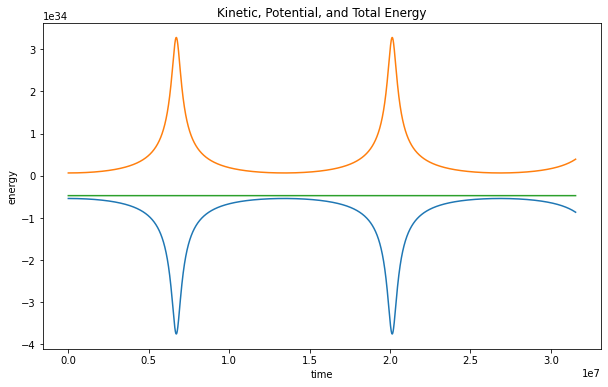

In [8]:
fig2 = plt.figure(figsize=(10,6))
Plot2 = fig2.add_subplot(111)
Plot2.plot(times, U)
Plot2.plot(times, K)
Plot2.plot(times, np.add(U,K))
Plot2.set(xlabel='time', ylabel='energy',
       title='Kinetic, Potential, and Total Energy') 

In [10]:
E = np.add(U,K)
print("deltaE = ",E[len(E)-1]-E[0], "joules")

deltaE =  1.2674977245228662e+30 joules
